In [ ]:
# ShunYuan Chiu
# 20210209

# 欄位介紹
### InvoiceNo: 發票號碼. 唯一值, "C"開頭代表該交易取消
### ItemCode: 產品代碼, 每個產品的唯一值
### DescriptionCode: 商品敘述代碼
### Quantity: 每個商品數量
### SellDate: 發票產生時間, 代表每筆交易發生的日期跟時間
### NewTaiwanDollors: 物品單價
### CustomerID: 用戶代碼, 唯一值
### District: 銷售縣市

## 讀取檔案

In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

In [2]:
import sqlite3
import pandas as pd

with sqlite3.connect('ecommerce.db') as con:
    df_ori = pd.read_sql_query("SELECT * FROM ecommerce", con=con)


## 1. 該題目是那種機器學習模式： 監督還是非監督？(5%)

A1:
__非監督__, 因爲觀察上面的資料, 並無提供label(答案), 而是要自行從一堆未給答案標籤的資料中整理出所需資訊

## 2. 將 Sqlite.db 檔案轉成 Pandas 的格式做資料處理(10%)
A2. 如下


In [3]:
df_ori

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District
0,536365,85123A,1546686,6,12/1/2018 8:26,255.0,17850.0,Zhongzheng District
1,536365,71053,1466048,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District
2,536365,84406B,4510747,8,12/1/2018 8:26,275.0,17850.0,Zhongzheng District
3,536365,84029G,6497318,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District
4,536365,84029E,3876120,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District
...,...,...,...,...,...,...,...,...
541904,581587,22613,2299374,12,12/9/2011 12:50,85.0,12680.0,Datong District
541905,581587,22899,8879580,6,12/9/2011 12:50,210.0,12680.0,Datong District
541906,581587,23254,3140812,4,12/9/2011 12:50,415.0,12680.0,Datong District
541907,581587,23255,5796013,4,12/9/2011 12:50,415.0,12680.0,Datong District


## 3. EDA（Exploratory Data Analysis）(30%)
### 3.1 資料探勘，請利用資料視覺化的方式觀察資料分佈進行分析，解釋資料分佈的狀況，包含但不限於outlier、缺值(10%)
### 3.2 透過3.1的分析說明哪些資料需要進行預處理，預處理後預計的效果、預處理的方式爲何、預處理實作後的資料分佈及分析 (10%) 
### 3.3 依據3.2調整後的資料集，用視覺化的方式找出特徵資料並說明您選擇該資料爲特徵的理由及這些特徵的意義(10%)

In [4]:
# 透過df.head, tail, info, describe 快速觀察資料狀態 
df_ori.head(20)

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District
0,536365,85123A,1546686,6,12/1/2018 8:26,255.0,17850.0,Zhongzheng District
1,536365,71053,1466048,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District
2,536365,84406B,4510747,8,12/1/2018 8:26,275.0,17850.0,Zhongzheng District
3,536365,84029G,6497318,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District
4,536365,84029E,3876120,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District
5,536365,22752,9934318,2,12/1/2018 8:26,765.0,17850.0,Zhongzheng District
6,536365,21730,1740436,6,12/1/2018 8:26,425.0,17850.0,Zhongzheng District
7,536366,22633,8111495,6,12/1/2018 8:28,185.0,17850.0,Zhongzheng District
8,536366,22632,2542977,6,12/1/2018 8:28,185.0,17850.0,Zhongzheng District
9,536367,84879,8760813,32,12/1/2018 8:34,169.0,13047.0,Zhongzheng District


In [5]:
df_ori.tail(20)

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District
541889,581585,22466,6922933,12,12/9/2011 12:31,195.0,15804.0,Zhongzheng District
541890,581586,22061,7116658,8,12/9/2011 12:49,295.0,13113.0,Zhongzheng District
541891,581586,23275,3362023,24,12/9/2011 12:49,125.0,13113.0,Zhongzheng District
541892,581586,21217,3332755,24,12/9/2011 12:49,895.0,13113.0,Zhongzheng District
541893,581586,20685,2340919,10,12/9/2011 12:49,708.0,13113.0,Zhongzheng District
541894,581587,22631,1717550,12,12/9/2011 12:50,195.0,12680.0,Datong District
541895,581587,22556,3577439,12,12/9/2011 12:50,165.0,12680.0,Datong District
541896,581587,22555,2610628,12,12/9/2011 12:50,165.0,12680.0,Datong District
541897,581587,22728,4203208,4,12/9/2011 12:50,375.0,12680.0,Datong District
541898,581587,22727,7083207,4,12/9/2011 12:50,375.0,12680.0,Datong District


In [6]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   InvoiceNo         541909 non-null  object 
 1   ItemCode          541909 non-null  object 
 2   DescriptionCode   540455 non-null  object 
 3   Quantity          541909 non-null  int64  
 4   SellDate          541909 non-null  object 
 5   NewTaiwanDollors  541909 non-null  float64
 6   CustomerID        406829 non-null  float64
 7   District          541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df_ori.describe()

,Quantity,NewTaiwanDollors,CustomerID
count,541909.000000,5.419090e+05,406829.000000
mean,9.552250,4.611114e+02,15287.690570
std,218.081158,9.675985e+03,1713.600303
min,-80995.000000,-1.106206e+06,12346.000000
25%,1.000000,1.250000e+02,13953.000000
50%,3.000000,2.080000e+02,15152.000000
75%,10.000000,4.130000e+02,16791.000000
max,80995.000000,3.897000e+06,18287.000000


### 觀察 head(20) 和 tail(20) 後, 初步作出以下推斷:  
1. InvoiceNo: 推論是逐筆生成的發票編號，所以會跟隨着交易時間而增加  
    -> 預計處理方式： 將該欄位拆成`純數字編號`以及`是否取消訂單`兩個欄位，方便針對此兩特徵進行後續分析  
2. ItemCode: 猜測編號不同位數的數字可能和商品類別相關，可和DescriptionCode做比對來驗證，但目前未定義銷售solution，尚未確定該特徵是否有用  
3. DescriptionCode: 同ItemCode  
4. CustomerID: 預估只是代號，所以可以將type改成int 或字串
5. District: 地區，  
-> 預計處理方式: 做onehot encoding  




### 觀察 df.info 後作出以下推論
1. 共 941909 筆資料，8個欄位
2. 其中 `DescriptionCode`, `CustomerID` 有 missing value, 補缺失值的方法將視銷售solution而定

### 觀察 db.describe 後，初步作出以下判斷:
1. Quantity, NewTaiwanDollors 理論上都該是`自然數`，但從 min 中看出最小值爲負值，需針對負值的資料進一步進行分析及處理

## 開始針對以上推論進行處理

### 將 InvoiceNo 拆成 InvoiceNo_num(int) 和 IsCanceled(boolean)

In [8]:
new = df_ori['InvoiceNo'].str.extract(r'(?P<IsCanceled>[A-Z])?(?P<InvoiceNo_num>\d*)')
df = pd.concat([df_ori, new], axis=1)
# df_ori.iloc[299981:299987]

分別觀察 IsCanceled 和 InvoiceNo_num

In [9]:

print('Length of InvoiceNo_num:', df['InvoiceNo_num'].str.len().unique())
print('Unique element of IsCanceled:', df['IsCanceled'].unique())


Length of InvoiceNo_num: [6]
Unique element of IsCanceled: [nan 'C' 'A']


- Length of InvoiceNo_num 可確定 InvoiceNo_num 皆爲 六位數的數字 
- Unique element of IsCanceled 預期只有 'C' 和 nan, 但出現了 'A'  
所以再做進一步觀察

In [10]:
df[df['IsCanceled'] == 'A']

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District,IsCanceled,InvoiceNo_num
299982,A563185,B,8121915,1,8/12/2011 14:50,1106206.0,NaN,Zhongzheng District,A,563185
299983,A563186,B,8121915,1,8/12/2011 14:51,-1106206.0,NaN,Zhongzheng District,A,563186
299984,A563187,B,8121915,1,8/12/2011 14:52,-1106206.0,NaN,Zhongzheng District,A,563187


發現 IsCanceled == 'A' 的情形(即 InvoiceNo 開頭爲A), 有三筆, 且看不出代表的含義, 決定視爲 noise 將其 drop 掉

In [11]:
""" drop 掉 noise, 並將 'C' 換成 True, nan換成 False """
df = df.drop(df[df['IsCanceled'] == 'A'].index)
df['IsCanceled'] = df['IsCanceled'].map({'C': 1})
df['IsCanceled'].fillna(value=0, inplace=True)

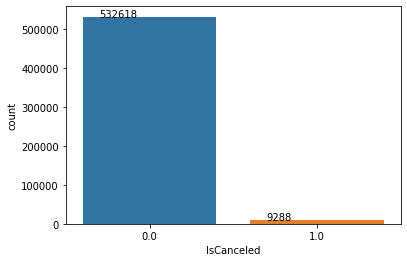

In [12]:
ax = sns.countplot(df['IsCanceled'])
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

## 541906項交易記錄中, 共532618件成功交易, 9288件取消交易,

In [68]:
df[(df['IsCanceled'] == 0) & (df['Quantity'] < 0)]
# df[(df['IsCanceled'] != 0) & (df['Quantity'] > 0)]

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District,IsCanceled,InvoiceNo_num
2406,536589,21777,None,-10,12/1/2018 16:50,0.0,NaN,Zhongzheng District,0.0,536589
4347,536764,84952C,None,-38,12/2/2018 14:42,0.0,NaN,Zhongzheng District,0.0,536764
7188,536996,22712,None,-20,12/3/2018 15:30,0.0,NaN,Zhongzheng District,0.0,536996
7189,536997,22028,None,-20,12/3/2018 15:30,0.0,NaN,Zhongzheng District,0.0,536997
7190,536998,85067,None,-6,12/3/2018 15:30,0.0,NaN,Zhongzheng District,0.0,536998
...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,8040807,-26,12/7/2011 18:36,0.0,NaN,Zhongzheng District,0.0,581210
535335,581212,22578,7082639,-1050,12/7/2011 18:38,0.0,NaN,Zhongzheng District,0.0,581212
535336,581213,22576,8040807,-30,12/7/2011 18:38,0.0,NaN,Zhongzheng District,0.0,581213
536908,581226,23090,1452540,-338,12/8/2011 9:56,0.0,NaN,Zhongzheng District,0.0,581226


In [69]:
df = df.drop(df[(df['IsCanceled'] == 0) & (df['Quantity'] < 0)].index)

觀察到未取消訂單但Quantity<0的情況, 將這些資料共 1336筆視爲noise, drop掉

## 接着觀察 Itemcode 欄位

In [70]:
print('總交易商品數:', df['ItemCode'].count())
print('商品種類數:', df['ItemCode'].nunique())

總交易商品數: 540570
商品種類數: 3956


In [71]:
# 觀察 ItemCode 的分佈（由於種類太多, 高達4069, 無法直接做圖）
vc = df['ItemCode'].value_counts()
vc

85123A    2312
22423     2200
85099B    2159
47566     1727
20725     1639
          ... 
90037A       1
84963A       1
21134        1
85098B       1
90187A       1
Name: ItemCode, Length: 3956, dtype: int64

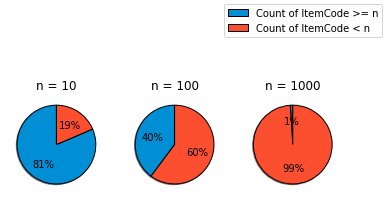

In [72]:
mt10 = vc[vc>=10].count()
lt10 = vc[vc<10].count()
mt100 = vc[vc>=100].count()
lt100 = vc[vc<100].count()
mt1000 = vc[vc>=1000].count()
lt1000 = vc[vc<1000].count()

fig, ax = plt.subplots(nrows=1, ncols=3)
labels = 'Count of ItemCode >= n', 'Count of ItemCode < n'
colors = ['#008fd5', '#fc4f30']

ax[0].pie([mt10, lt10], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[0].set_title('n = 10')
ax[1].pie([mt100, lt100], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[1].set_title('n = 100')
ax[2].pie([mt1000, lt1000], startangle=90, colors=colors, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
ax[2].set_title('n = 1000')

fig.legend(labels=labels, fontsize='medium')


上圖中, 我將臨界值分別設定 10, 100, 1000, 
也就是同一種商品被購買次數 > 100 佔了 3956 的 40%
可看出 ItemCode 是長尾資料 

In [73]:
vc

85123A    2312
22423     2200
85099B    2159
47566     1727
20725     1639
          ... 
90037A       1
84963A       1
21134        1
85098B       1
90187A       1
Name: ItemCode, Length: 3956, dtype: int64

接着觀察 DescriptionCode, 直覺上覺得 DescriptionCode 應該會跟着 ItemCode, 也就是同一種商品只會有同一種敘述

In [74]:
vc = df['ItemCode'].value_counts()
vc
df[df['ItemCode'] == '85123A']['DescriptionCode'].unique()

array(['1546686', '8753662', '9065634'], dtype=object)

但在上一個cell發現不然, 商品 '85123A' 居然有4種不同的DescriptionCode， 所以我們繼續觀察

In [221]:
_85123A_des = df[df['ItemCode'] == '85123A']['DescriptionCode'].unique().tolist()
df[df['DescriptionCode'].isin(_85123A_des)]

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District,IsCanceled,InvoiceNo_num
0,536365,85123A,1546686,6,12/1/2018 8:26,255.0,17850.0,Zhongzheng District,0.0,536365
49,536373,85123A,1546686,6,12/1/2018 9:02,255.0,17850.0,Zhongzheng District,0.0,536373
66,536375,85123A,1546686,6,12/1/2018 9:32,255.0,17850.0,Zhongzheng District,0.0,536375
220,536390,85123A,1546686,64,12/1/2018 10:19,255.0,17511.0,Zhongzheng District,0.0,536390
262,536394,85123A,1546686,32,12/1/2018 10:39,255.0,13408.0,Zhongzheng District,0.0,536394
...,...,...,...,...,...,...,...,...,...,...
539342,581439,85123A,9065634,1,12/8/2011 16:30,579.0,NaN,Zhongzheng District,0.0,581439
539979,581452,85123A,1546686,32,12/8/2011 18:03,255.0,17675.0,Zhongzheng District,0.0,581452
540217,581472,85123A,1546686,6,12/8/2011 19:55,295.0,15796.0,Zhongzheng District,0.0,581472
540837,581492,85123A,9065634,3,12/9/2011 10:03,579.0,NaN,Zhongzheng District,0.0,581492


仍看不出`DescriptyionCode`的規則，後續再進一步觀察及補值

### 接着觀察 CustomID，並嘗試對其補值

In [27]:
print('Nan of CustomerID:', df['CustomerID'].isna().sum())

# 嘗試用相同的InvoiceNo來補值
_IN_cu_na = df[df['CustomerID'].isna()]['InvoiceNo_num'].unique().tolist()
df[df['InvoiceNo_num'].isin(_IN_cu_na) & df['CustomerID'].notna()]

Nan of CustomerID: 135077


,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District,IsCanceled,InvoiceNo_num


In [ ]:
嘗試使用InvoiceNo 比對 CustomerID 補值, 但並無效果

In [28]:
df.head(5)

,InvoiceNo,ItemCode,DescriptionCode,Quantity,SellDate,NewTaiwanDollors,CustomerID,District,IsCanceled,InvoiceNo_num
0,536365,85123A,1546686,6,12/1/2018 8:26,255.0,17850.0,Zhongzheng District,0.0,536365
1,536365,71053,1466048,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District,0.0,536365
2,536365,84406B,4510747,8,12/1/2018 8:26,275.0,17850.0,Zhongzheng District,0.0,536365
3,536365,84029G,6497318,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District,0.0,536365
4,536365,84029E,3876120,6,12/1/2018 8:26,339.0,17850.0,Zhongzheng District,0.0,536365


---


經以上分析, 預計使用的特徵組合及策略如下所列：  
1. 透過 InvoiceNo_num 和 ItemCode 利用 Association rule learning 找出每一筆交易客戶對商品的喜好關聯  
2. 透過 SellDate 和 ItemCode 觀察客戶在不同時間序列週期(早上下午, 一年四季等)是否有有不同商品需求  
3. 透過 District 和 ItemCode 可觀察不同商品在不同地區的熱門程度, 藉以優化`大通路`在各地倉儲的貨物存放策略  
4. 綜合 1, 2, 3 將客戶喜好關聯更細分不同時段, 地區, 藉以定出更細節的銷售策略

由於時間關係, 本次只實作項目1

## 4. 經過以上的分析, 請透過機器學習方法替客戶規劃一個可行的行銷策略(25%)
### 4.1 預期使用什麼機器學習演算法實踐？ 爲什麼？

A 4.1: 預計使用 Apriori Algorithm, 一般在實作關聯規則時候會先用基礎的 Apriori 或是 FP-Growth tree 再選用這兩者的變形或更複雜的演算法, 而這兩個演算法的選用一般看資料量, 量太大有訓練效能考量時, 會以FP-Growth tree 優先考量, 否則選用 Apriori

### 4.2 說明並實作所選定的機器學習演算法

In [30]:
from collections import defaultdict

# 將不同 InvoiceNo_num 的 ItemCode 分組放入一個 2d list中
temp_dict = defaultdict(list)
for idx, row in df.iterrows():
    key = row['InvoiceNo_num']
    value = row['ItemCode']
    temp_dict[key].append(value)

print(len(temp_dict))

25897


In [41]:
data = list(temp_dict.values())

In [53]:
from apyori import apriori

association_rules = apriori(data, min_support=0.02, min_confidence=0.5, min_lift=2, max_length=3) 
association_results = list(association_rules)
print('rule數', len(association_results))

for item in association_results:
   pair = item[0] 
   items = [x for x in pair]
   print("Rule: " + items[0] + " -> " + items[1])
   print("Support: " + str(item[1]))
   print("Confidence: " + str(item[2][0][2]))
   print("Lift: " + str(item[2][0][3]))
   print("=====================================")


rule數 23
Rule: 20712 -> 85099B
Support: 0.02077380492702139
Confidence: 0.6169724770642201
Lift: 7.48400618782631
Rule: 20724 -> 22356
Support: 0.02031044868329601
Confidence: 0.500952380952381
Lift: 17.07061152882206
Rule: 20725 -> 20726
Support: 0.0205421268051587
Confidence: 0.5130183220829316
Lift: 8.262530164989903
Rule: 20725 -> 20727
Support: 0.025021237161170745
Confidence: 0.5003861003861004
Lift: 8.05907912176569
Rule: 20725 -> 22383
Support: 0.025600432465827477
Confidence: 0.5076569678407351
Lift: 8.17618168727572
Rule: 20725 -> 22384
Support: 0.023669781450305044
Confidence: 0.5522522522522523
Lift: 8.894420913450764
Rule: 85099B -> 21928
Support: 0.02108270908950498
Confidence: 0.6691176470588236
Lift: 8.116538090646095
Rule: 85099B -> 21929
Support: 0.02015599660205421
Confidence: 0.5952109464082097
Lift: 7.220034234229421
Rule: 21931 -> 85099B
Support: 0.028303343887558886
Confidence: 0.6103247293921732
Lift: 7.403367607399766
Rule: 22086 -> 22910
Support: 0.02143022627

共找出 23 條 rule, 各參數分別代表：  
support: 該商品被交易的次數/總交易次數 `即該商品受歡迎程度`  
confidence: 同時包含商品A和商品B的次數/包含商品A的次數  
lift: support/confidence  `即該rule的對該商品的提升度` 

提升度關聯規則  

提升度=1 → A和B之間沒有關聯  
提升度<1 → A和B不可能一起購買  
提升度>1 → 提升度越大，購買兩種產品的可能性越大


## 5. 請將資料拆成訓練及測試集(Training Set & Test Set), 並驗證你規劃的機器學習準確度(25%)
### 5.1 有哪些演算法可以做驗證?(5%)
### 5.2 打算用哪些演算法來驗證?(5%)
### 5.3 驗證的流程與方法(15%)

A5:
在非監督學習中, 很少用訓練集本身切分再作爲測試, 因爲切出來的部分本就不具標準答案, 這樣的驗證標準會有瑕疵, 所以實務上會透過訓練出來的模型去執行另一個有答案的任務測試集,
舉例來說, BERT 本身雖然是非監督式學習, 但最後產出模型仍用監督式學習作爲下游fine-tuning任務
以 Aprori 來說, `confident` 和 `Lift` 就可視爲其 validation 結果

若需要更客觀的驗證方式, 應設計另一場景, 並以特定標準取代準確率作爲該模型效果的考量, 例如
__大通路在執行新的rule的策略(像是把同組的商品放在同一個架子上)後, 對所影響商品實際賣出數量的提升率__

## 6. 假若投入生產, 效果不如預期, 可能原因爲何？後續要如何調整與優化的方向(5%)

A6. 效果不如預期有兩種可能性:  

1. 效果有提升但提升效果有限  
    -> 因爲規則是對的, 所以改善共同規則的宣傳方式, 加深策略執行  （商業執行面）  
    -> 增加更多規則, 因爲是試水溫, 只用了23條規則, 在 confident 及 Lift 不降低的前提增加規則影響的廣度, 降低 support  
    
2. 效果無明顯提升或下降  
    -> 將其他條件如 District, SellDate 等考慮其中, 做廣義關聯規則 (generalized association rules)  
    -> 就效果下降的商品再研究是否是資料有誤或noise  
    -> 更換其他演算法
